In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submit = pd.read_csv('sample_submit.csv', header=None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)
sample_submit = reduce_mem_usage(sample_submit)

Mem. usage decreased to  0.03 Mb (72.8% reduction)
Mem. usage decreased to  0.00 Mb (69.4% reduction)
Mem. usage decreased to  0.00 Mb (36.7% reduction)


In [4]:
test

,datetime,client,close,price_am,price_pm
0,2016-04-01,1,0,3,2
1,2016-04-02,0,0,5,5
2,2016-04-03,1,0,2,2
3,2016-04-04,1,0,1,1
4,2016-04-05,0,0,1,1
...,...,...,...,...,...
360,2017-03-27,0,0,5,4
361,2017-03-28,0,0,4,4
362,2017-03-29,0,0,3,3
363,2017-03-30,0,0,4,3


In [5]:
train.tail(200)

,datetime,y,client,close,price_am,price_pm
1901,2015-09-14,48,0,0,0,0
1902,2015-09-15,48,0,0,0,0
1903,2015-09-16,57,0,0,0,0
1904,2015-09-17,31,0,0,0,0
1905,2015-09-18,45,0,0,0,0
1906,2015-09-19,47,0,0,1,1
1907,2015-09-20,67,0,0,2,1
1908,2015-09-21,61,0,0,1,0
1909,2015-09-22,51,0,0,1,1
1910,2015-09-23,56,0,0,0,1


<Axes: xlabel='price_am', ylabel='count'>

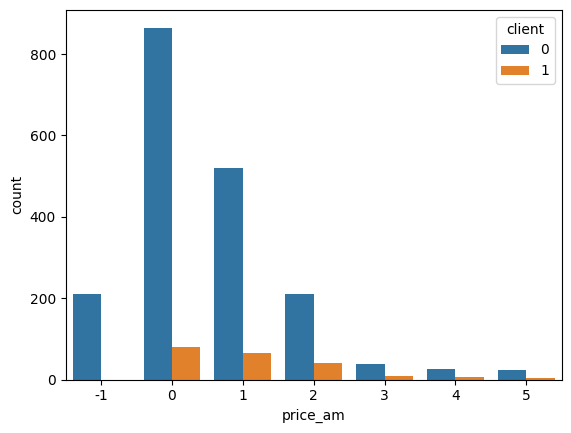

In [6]:
sns.countplot(x='price_am', hue='client', data=train)

<Axes: xlabel='price_am', ylabel='count'>

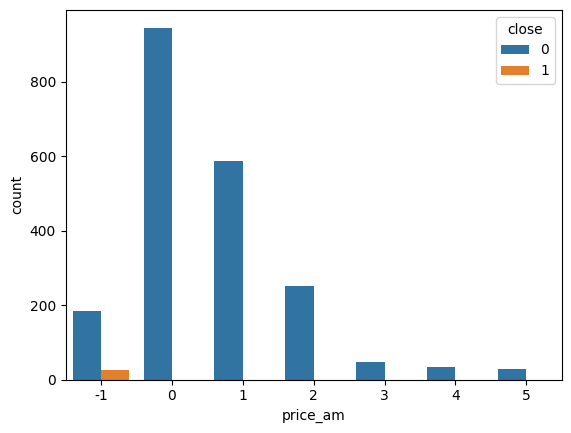

In [7]:
sns.countplot(x='price_am', hue='close', data=train)

In [8]:
data_all = pd.concat([train, test], sort=False)

In [9]:
data_all

,datetime,y,client,close,price_am,price_pm
0,2010-07-01,17.0,0,0,-1,-1
1,2010-07-02,18.0,0,0,-1,-1
2,2010-07-03,20.0,0,0,-1,-1
3,2010-07-04,20.0,0,0,-1,-1
4,2010-07-05,14.0,0,0,-1,-1
...,...,...,...,...,...,...
360,2017-03-27,NaN,0,0,5,4
361,2017-03-28,NaN,0,0,4,4
362,2017-03-29,NaN,0,0,3,3
363,2017-03-30,NaN,0,0,4,3


In [10]:
data_all['mean_price'] = (data_all['price_am'] + data_all['price_pm'])/2
data_all['price_max'] = data_all[['price_am', 'price_pm']].max(axis=1)
data_all['price_min'] = data_all[['price_am', 'price_pm']].min(axis=1)

# data_all['cli*am'] = data_all['client']*data_all['price_am']
# data_all['cli*pm'] = data_all['client']*data_all['price_pm']

# data_all['cli*mean'] = data_all['client']*((data_all['price_am'] + data_all['price_pm'])/2)
# data_all['cli*pmax'] = data_all['client']*data_all[['price_am', 'price_pm']].max(axis=1)
# data_all['cli*pmin'] = data_all['client']*data_all[['price_am', 'price_pm']].min(axis=1)

data_all['datetime'] = pd.to_datetime(data_all['datetime'])
# data_all['dayofweek'] = data_all['datetime'].dt.dayofweek
# weekly_avg = data_all.groupby('dayofweek')[['price_am', 'price_pm', 'mean_price']].mean()
# weekly_avg_rounded = weekly_avg.round(1)
# data_all = pd.merge(data_all, weekly_avg_rounded, left_on='dayofweek', right_index=True, suffixes=('', '_weekly_avg'))

monthly_avg = data_all.groupby(data_all['datetime'].dt.to_period('M'))[['price_am', 'price_pm', 'mean_price']].mean()
monthly_avg_rounded = monthly_avg.round(1)
data_all = data_all.merge(monthly_avg_rounded, left_on=data_all['datetime'].dt.to_period('M'), 
                          right_index=True, suffixes=('', '_monthly_avg'))

# data_all['clo*am'] = data_all['close']*data_all['price_am']
# data_all['clo*pm'] = data_all['close']*data_all['price_pm']
data_all['clo*mean_price'] = data_all['close']*data_all['mean_price']

# data_all['am*pm'] = data_all['price_am']*data_all['price_pm']
# data_all['cli*clo'] = data_all['client']*data_all['close']
# data_all['cli*am'] = data_all['client']*data_all['price_am']
# data_all['cli*pm'] = data_all['client']*data_all['price_pm']
# data_all['clo*am'] = data_all['close']*data_all['price_am']
# data_all['clo*pm'] = data_all['close']*data_all['price_pm']

# data_all['am+pm'] = data_all['price_am']+data_all['price_pm']
# data_all['cli+clo'] = data_all['client']+data_all['close']
# data_all['cli+am'] = data_all['client']+data_all['price_am']
# data_all['cli+pm'] = data_all['client']+data_all['price_pm']
# data_all['clo+am'] = data_all['close']+data_all['price_am']
# data_all['clo+pm'] = data_all['close']+data_all['price_pm']

# data_all['am-pm'] = data_all['price_am']-data_all['price_pm']
# data_all['cli-clo'] = data_all['client']-data_all['close']
# data_all['cli-am'] = data_all['client']-data_all['price_am']
# data_all['cli-pm'] = data_all['client']-data_all['price_pm']
# data_all['clo-am'] = data_all['close']-data_all['price_am']
# data_all['clo-pm'] = data_all['close']-data_all['price_pm']

data_all['oneday_before_am'] = data_all['price_am'].shift(1)
data_all['oneday_before_pm'] = data_all['price_pm'].shift(1)
data_all['oneday_before_pmean'] = data_all['mean_price'].shift(1)
data_all['oneday_before_pmax'] = data_all['price_max'].shift(1)
data_all['oneday_before_pmin'] = data_all['price_min'].shift(1)

data_all['rel_1week_am'] = data_all['price_am'].rolling(7).sum()
data_all['rel_1week_pm'] = data_all['price_pm'].rolling(7).sum()
# data_all['rel_1week_cli'] = data_all['client'].rolling(7).sum()
# data_all['rel_1week_clo'] = data_all['close'].rolling(7).sum()
data_all['rel_1week_pmean'] = data_all['mean_price'].rolling(7).sum()
data_all['rel_1week_pmax'] = data_all['price_max'].rolling(7).sum()
data_all['rel_1week_pmin'] = data_all['price_min'].rolling(7).sum()

data_all['rel_2week_am'] = data_all['price_am'].rolling(14).sum()
data_all['rel_2week_pm'] = data_all['price_pm'].rolling(14).sum()
# data_all['rel_2week_cli'] = data_all['client'].rolling(14).sum()
# data_all['rel_2week_clo'] = data_all['close'].rolling(14).sum()
data_all['rel_2week_pmean'] = data_all['mean_price'].rolling(14).sum()
data_all['rel_2week_pmax'] = data_all['price_max'].rolling(14).sum()
data_all['rel_2week_pmin'] = data_all['price_min'].rolling(14).sum()

# data_all['rel_3week_am'] = data_all['price_am'].rolling(21).sum()
# data_all['rel_3week_pm'] = data_all['price_pm'].rolling(21).sum()
# data_all['rel_3week_cli'] = data_all['client'].rolling(21).sum()
# data_all['rel_3week_clo'] = data_all['close'].rolling(21).sum()
# data_all['rel_3week_pmean'] = data_all['mean_price'].rolling(21).sum()
# data_all['rel_3week_pmax'] = data_all['price_max'].rolling(21).sum()
# data_all['rel_3week_pmin'] = data_all['price_min'].rolling(21).sum()

data_all['rel_4week_am'] = data_all['price_am'].rolling(28).sum()
data_all['rel_4week_pm'] = data_all['price_pm'].rolling(28).sum()
# data_all['rel_4week_cli'] = data_all['client'].rolling(28).sum()
# data_all['rel_4week_clo'] = data_all['close'].rolling(28).sum()
data_all['rel_4week_pmean'] = data_all['mean_price'].rolling(28).sum()
data_all['rel_4week_pmax'] = data_all['price_max'].rolling(28).sum()
data_all['rel_4week_pmin'] = data_all['price_min'].rolling(28).sum()

data_all['rel_8week_am'] = data_all['price_am'].rolling(56).sum()
data_all['rel_8week_pm'] = data_all['price_pm'].rolling(56).sum()
# data_all['rel_8week_cli'] = data_all['client'].rolling(56).sum()
# data_all['rel_8week_clo'] = data_all['close'].rolling(56).sum()
data_all['rel_8week_pmean'] = data_all['mean_price'].rolling(56).sum()
data_all['rel_8week_pmax'] = data_all['price_max'].rolling(56).sum()
data_all['rel_8week_pmin'] = data_all['price_min'].rolling(56).sum()

data_all['rel_16week_am'] = data_all['price_am'].rolling(112).sum()
data_all['rel_16week_pm'] = data_all['price_pm'].rolling(112).sum()
# data_all['rel_16week_cli'] = data_all['client'].rolling(112).sum()
# data_all['rel_16week_clo'] = data_all['close'].rolling(112).sum()
data_all['rel_16week_pmean'] = data_all['mean_price'].rolling(112).sum()
data_all['rel_16week_pmax'] = data_all['price_max'].rolling(112).sum()
data_all['rel_16week_pmin'] = data_all['price_min'].rolling(112).sum()

data_all['datetime'] = pd.to_datetime(data_all['datetime']) 
data_all['year'] = data_all['datetime'].dt.year
data_all['month'] = data_all['datetime'].dt.month
data_all['day'] = data_all['datetime'].dt.day
data_all['dayofweek'] = data_all['datetime'].dt.dayofweek

In [11]:
drop_columns = ['datetime', 'key_0', 'price_max', 'price_min']
data_all = data_all.fillna(0)
data_all.drop(drop_columns, axis=1, inplace=True)
data_all

,y,client,close,price_am,price_pm,mean_price,price_am_monthly_avg,price_pm_monthly_avg,mean_price_monthly_avg,clo*mean_price,oneday_before_am,oneday_before_pm,oneday_before_pmean,oneday_before_pmax,oneday_before_pmin,rel_1week_am,rel_1week_pm,rel_1week_pmean,rel_1week_pmax,rel_1week_pmin,rel_2week_am,rel_2week_pm,rel_2week_pmean,rel_2week_pmax,rel_2week_pmin,rel_4week_am,rel_4week_pm,rel_4week_pmean,rel_4week_pmax,rel_4week_pmin,rel_8week_am,rel_8week_pm,rel_8week_pmean,rel_8week_pmax,rel_8week_pmin,rel_16week_am,rel_16week_pm,rel_16week_pmean,rel_16week_pmax,rel_16week_pmin,year,month,day,dayofweek
0,17.0,0,0,-1,-1,-1.0,-1.0,-1.0,-1.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,7,1,3
1,18.0,0,0,-1,-1,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,7,2,4
2,20.0,0,0,-1,-1,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,7,3,5
3,20.0,0,0,-1,-1,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,7,4,6
4,14.0,0,0,-1,-1,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,7,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,0,0,5,4,4.5,2.4,2.4,2.4,0.0,4.0,4.0,4.0,4.0,4.0,27.0,28.0,27.5,30.0,25.0,43.0,48.0,45.5,51.0,40.0,61.0,61.0,61.0,70.0,52.0,85.0,78.0,81.5,94.0,69.0,104.0,88.0,96.0,113.0,79.0,2017,3,27,0
361,0.0,0,0,4,4,4.0,2.4,2.4,2.4,0.0,5.0,4.0,4.5,5.0,4.0,27.0,28.0,27.5,30.0,25.0,45.0,51.0,48.0,53.0,43.0,63.0,63.0,63.0,72.0,54.0,88.0,81.0,84.5,97.0,72.0,108.0,92.0,100.0,117.0,83.0,2017,3,28,1
362,0.0,0,0,3,3,3.0,2.4,2.4,2.4,0.0,4.0,4.0,4.0,4.0,4.0,28.0,27.0,27.5,29.0,26.0,47.0,52.0,49.5,54.0,45.0,64.0,65.0,64.5,73.0,56.0,90.0,83.0,86.5,99.0,74.0,111.0,95.0,103.0,120.0,86.0,2017,3,29,2
363,0.0,0,0,4,3,3.5,2.4,2.4,2.4,0.0,3.0,3.0,3.0,3.0,3.0,29.0,28.0,28.5,30.0,27.0,49.0,52.0,50.5,55.0,46.0,67.0,67.0,67.0,76.0,58.0,94.0,86.0,90.0,103.0,77.0,115.0,98.0,106.5,124.0,89.0,2017,3,30,3


In [12]:
train = data_all[:len(train)]
test = data_all[len(train):]
y = train['y'] # 目的変数
X = train.drop('y', axis=1) # 目的変数を除いたデータ
X_test = test.drop('y', axis=1)

In [13]:
from sklearn.metrics import mean_absolute_error as MAE
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(n_estimators=200)
lgb_model.fit(X, y)

# from sklearn.ensemble import GradientBoostingClassifier
# # 勾配ブースティングモデルの作成と学習
# gbc_model = GradientBoostingClassifier()
# gbc_model.fit(X, y)

# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import SequentialFeatureSelector
# LR_model = LinearRegression()
# sfs = SequentialFeatureSelector(LR_model, n_features_to_select=3, scoring='neg_mean_absolute_error')
# sfs.fit(X, y)

# from sklearn.linear_model import Lasso
# L_model = Lasso(alpha=0.01)
# L_model.fit(X, y)

# from sklearn.tree import DecisionTreeRegressor
# DTR_model = DecisionTreeRegressor()
# DTR_model.fit(X, y)

from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=200)
RF_model.fit(X, y)

from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=200)
xgb_model.fit(X, y)

from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(n_estimators=200)
catboost_model.fit(X, y)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2437
[LightGBM] [Info] Number of data points in the train set: 2101, number of used features: 43
[LightGBM] [Info] Start training from score 34.096621
Learning rate set to 0.170367
0:	learn: 15.7185386	total: 149ms	remaining: 29.6s
1:	learn: 14.1170492	total: 156ms	remaining: 15.5s
2:	learn: 12.9368449	total: 163ms	remaining: 10.7s
3:	learn: 11.9113326	total: 168ms	remaining: 8.25s
4:	learn: 11.0336411	total: 174ms	remaining: 6.8s
5:	learn: 10.3181403	total: 180ms	remaining: 5.82s
6:	learn: 9.8049781	total: 185ms	remaining: 5.11s
7:	learn: 9.3081930	total: 191ms	remaining: 4.58s
8:	learn: 8.9124505	total: 196ms	remaining: 4.16s
9:	learn: 8.6434431	total: 202ms	remaining: 3.83s
10:	learn: 8.3745003	total: 207ms	remaining: 3.55s
11:	learn: 8.1391485	total: 211ms	remaining: 3.3s
12:	learn: 7.958102

In [14]:
# 元の特徴量を使ったモデルの予測
lgb_pred = lgb_model.predict(X_test)
lgb_pred_2 = lgb_model.predict(X)
MAE(y,lgb_pred_2)

2.156541344825717

In [15]:
# gbc_pred = gbc_model.predict(X_test)
# gbc_pred_2 = gbc_model.predict(X)
# MAE(y,gbc_pred_2)

In [16]:
# L_pred = L_model.predict(X_test)
# L_pred_2 = L_model.predict(X)
# MAE(y,L_pred_2)

In [17]:
# DTR_pred = DTR_model.predict(X_test)
# DTR_pred_2 = DTR_model.predict(X)
# MAE(y,DTR_pred_2)

In [18]:
RF_pred = RF_model.predict(X_test)
RF_pred_2 = RF_model.predict(X)
MAE(y,RF_pred_2)

1.8771180390290336

In [19]:
xgb_pred = xgb_model.predict(X_test)
xgb_pred_2 = xgb_model.predict(X)
MAE(y,xgb_pred_2)

0.4113909834605783

In [20]:
catboost_pred = catboost_model.predict(X_test)
catboost_pred_2 = catboost_model.predict(X)
MAE(y,catboost_pred_2)

3.000754101133646

In [21]:
# submit = sample_submit
# # submit[1] = gbc_pred.round(decimals=1).astype(int)
# submit[1] = MAE_pred.round(decimals=1).astype(int)
# submit.columns = ['index', 'prediction']

In [22]:
# submit.head(200)

In [23]:
# submit.to_csv('submit_230721.csv', header=False, index=False)

In [24]:
submit = sample_submit
submit[1] = np.array(xgb_pred)
#日付の区切りを'/'から'-'へ
submit[0] = pd.to_datetime(submit[0])
submit.to_csv('submit.csv', header=False, index=False)

In [25]:
submit.tail(200)

,0,1
165,2016-09-13,37.162933
166,2016-09-14,33.523258
167,2016-09-15,32.800362
168,2016-09-16,48.856888
169,2016-09-17,57.515797
170,2016-09-18,56.081905
171,2016-09-19,41.661583
172,2016-09-20,49.196777
173,2016-09-21,50.878025
174,2016-09-22,56.148346
